
# Problem Statement EVA 8, Session7 : CIFAR 10

**Target**: 

- Train resnet18 for 20 epochs on the CIFAR10 dataset
- show loss curves for test and train datasets
- show a gallery of 10 misclassified images
- show gradcam Links to an external site.output on 10 misclassified images. Remember if you are applying GradCAM on a channel that is less than 5px, then please don't bother to submit the assignment. 😡🤬🤬🤬🤬
Once done, upload the code to GitHub, and share the code. This readme must link to the main repo so we can read your file structure. 
- Train for 20 epochs
  - Get 10 misclassified images
  - Get 10 GradCam outputs on any misclassified images (remember that you MUST use the library we discussed in the class)
- Apply these transforms while training:
    - RandomCrop(32, padding=4)
    - CutOut(16x16)
*   Target Accuracy is 85+%

---



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from __future__ import print_function
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
import shutil

In [60]:
%cd ..

/EVA8


In [61]:
%cd ..

/


In [62]:
shutil.rmtree('EVA8')

In [63]:
!git clone https://github.com/shreyash-99/EVA8.git

Cloning into 'EVA8'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 558 (delta 105), reused 100 (delta 50), pack-reused 396
Receiving objects: 100% (558/558), 5.59 MiB | 3.91 MiB/s, done.
Resolving deltas: 100% (331/331), done.


In [64]:
%cd EVA8/EVA8-pytorch

/EVA8/EVA8-pytorch


[autoreload of utils7 failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'utils7'
]
[autoreload of main4 failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)


In [65]:
%ls

main2.py  main4.py  models/  utils2.py  utils4.py  utils6.py  utils8.py
main3.py  main.py   random   utils3.py  utils5.py  utils7.py  utils.py


In [57]:
pwd

'/EVA8/EVA8-pytorch'

In [66]:
from utils8 import *

In [67]:
from main4 import *

In [12]:
%cd models

/EVA8/EVA8-pytorch/models


In [13]:
from resnet import *

In [14]:
%cd ..

/EVA8/EVA8-pytorch


In [15]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
BATCH_SIZE = 128
train_loader = torch.utils.data.DataLoader(Albumentation_cifar_Dataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(Albumentation_cifar_Dataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

In [17]:
info_about_dataset(trainset)

[Train
 - Numpy Shape: (50000, 32, 32, 3)
 - min: [0. 0. 0.]
 - max: [1. 1. 1.]
 - mean: [0.49139968 0.48215841 0.44653091]
 - std: [0.24703223 0.24348513 0.26158784]
 - var: [15.56135559 15.11767693 17.44919073]


In [18]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


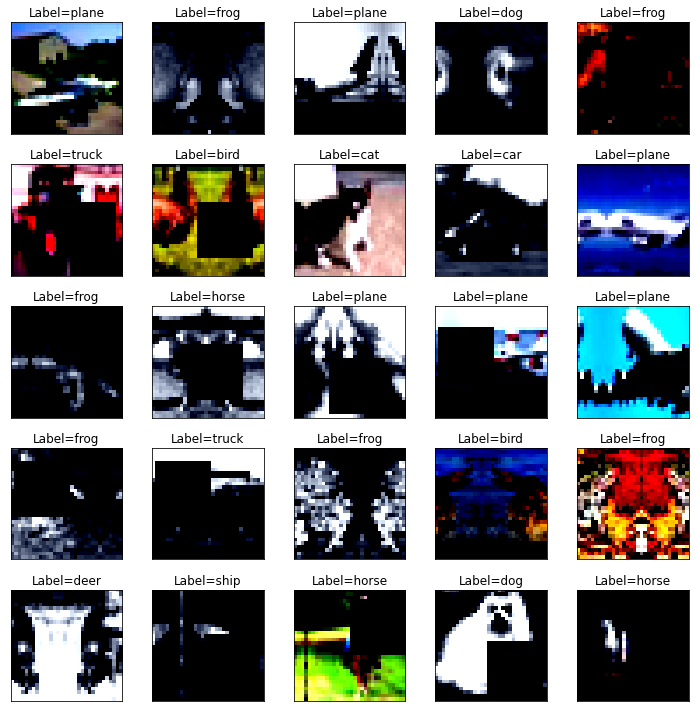

In [19]:
visualize_augmented_images(train_loader, classes, 5,5)

In [20]:
images_train, label_train = next(iter(train_loader))
images_test, label_test = next(iter(test_loader))

print(images_train[0].shape)
print(images_test[0].shape)

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


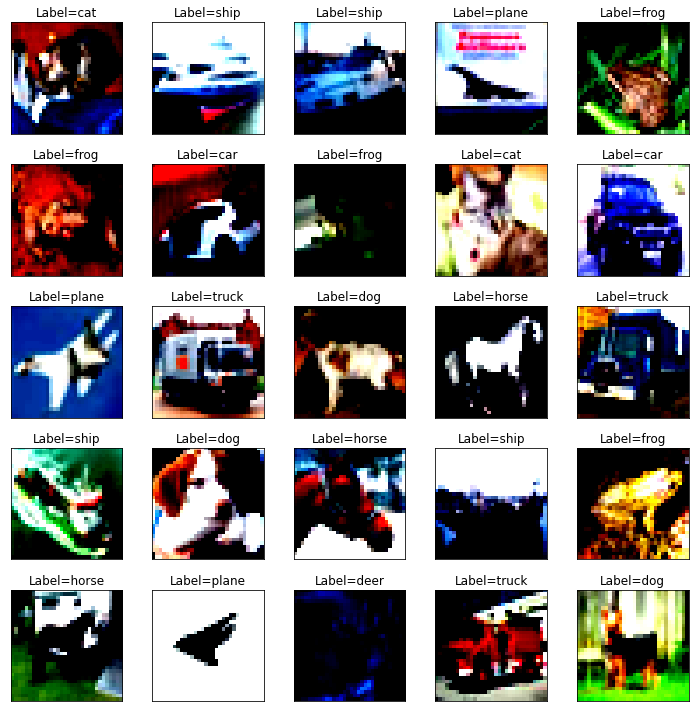

In [21]:
visualize_augmented_images(test_loader, classes, 5,5)

In [22]:
# Loading ResNet18 Model
model_new = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
model_new = model_new.to(device)

cuda


In [23]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(model_new, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
    

In [24]:
train_param, test_param = train_network(model_new, device, train_loader, test_loader, EPOCHS=20, lr=0.01)


Loss=1.2367753982543945 Batch_id=390 Accuracy=40.05: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]


Test set: Average loss: 0.0096, Accuracy: 5588/10000 (55.88%)



Loss=1.2701382637023926 Batch_id=390 Accuracy=55.84: 100%|██████████| 391/391 [00:48<00:00,  8.11it/s]


Test set: Average loss: 0.0096, Accuracy: 5900/10000 (59.00%)



Loss=1.1523507833480835 Batch_id=390 Accuracy=62.23: 100%|██████████| 391/391 [00:48<00:00,  8.09it/s]


Test set: Average loss: 0.0066, Accuracy: 6987/10000 (69.87%)



Loss=0.8869228363037109 Batch_id=390 Accuracy=66.77: 100%|██████████| 391/391 [00:48<00:00,  8.10it/s]


Test set: Average loss: 0.0089, Accuracy: 6564/10000 (65.64%)



Loss=0.9432547688484192 Batch_id=390 Accuracy=69.99: 100%|██████████| 391/391 [00:48<00:00,  8.09it/s]


Test set: Average loss: 0.0056, Accuracy: 7556/10000 (75.56%)



Loss=0.7091596722602844 Batch_id=390 Accuracy=72.45: 100%|██████████| 391/391 [00:48<00:00,  8.10it/s]


Test set: Average loss: 0.0057, Accuracy: 7480/10000 (74.80%)



Loss=0.6313072443008423 Batch_id=390 Accuracy=78.02: 100%|██████████| 391/391 [00:48<00:00,  8.10it/s]


Test set: Average loss: 0.0037, Accuracy: 8411/10000 (84.11%)



Loss=0.37528136372566223 Batch_id=390 Accuracy=79.18: 100%|██████████| 391/391 [00:48<00:00,  8.09it/s]


Test set: Average loss: 0.0036, Accuracy: 8451/10000 (84.51%)



Loss=0.7871106863021851 Batch_id=390 Accuracy=79.66: 100%|██████████| 391/391 [00:48<00:00,  8.06it/s]


Test set: Average loss: 0.0036, Accuracy: 8488/10000 (84.88%)



Loss=0.6526386737823486 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [00:48<00:00,  8.08it/s]


Test set: Average loss: 0.0036, Accuracy: 8457/10000 (84.57%)



Loss=0.6152591705322266 Batch_id=390 Accuracy=80.50: 100%|██████████| 391/391 [00:48<00:00,  8.06it/s]


Test set: Average loss: 0.0034, Accuracy: 8528/10000 (85.28%)



Loss=0.5228683948516846 Batch_id=390 Accuracy=80.73: 100%|██████████| 391/391 [00:48<00:00,  8.07it/s]


Test set: Average loss: 0.0034, Accuracy: 8522/10000 (85.22%)



Loss=0.49664026498794556 Batch_id=390 Accuracy=81.56: 100%|██████████| 391/391 [00:48<00:00,  8.03it/s]


Test set: Average loss: 0.0033, Accuracy: 8584/10000 (85.84%)



Loss=0.49911370873451233 Batch_id=390 Accuracy=81.84: 100%|██████████| 391/391 [00:48<00:00,  8.07it/s]


Test set: Average loss: 0.0033, Accuracy: 8603/10000 (86.03%)



Loss=0.4738570749759674 Batch_id=390 Accuracy=81.92: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]


Test set: Average loss: 0.0033, Accuracy: 8606/10000 (86.06%)



Loss=0.43995141983032227 Batch_id=390 Accuracy=81.98: 100%|██████████| 391/391 [00:49<00:00,  7.83it/s]


Test set: Average loss: 0.0033, Accuracy: 8614/10000 (86.14%)



Loss=0.4017840325832367 Batch_id=390 Accuracy=81.94: 100%|██████████| 391/391 [00:49<00:00,  7.85it/s]


Test set: Average loss: 0.0033, Accuracy: 8614/10000 (86.14%)



Loss=0.4330795407295227 Batch_id=390 Accuracy=81.87: 100%|██████████| 391/391 [00:49<00:00,  7.88it/s]


Test set: Average loss: 0.0033, Accuracy: 8616/10000 (86.16%)



Loss=0.4703265130519867 Batch_id=390 Accuracy=82.16: 100%|██████████| 391/391 [00:49<00:00,  7.86it/s]


Test set: Average loss: 0.0033, Accuracy: 8602/10000 (86.02%)



Loss=0.5491556525230408 Batch_id=390 Accuracy=81.94: 100%|██████████| 391/391 [00:49<00:00,  7.86it/s]


Test set: Average loss: 0.0033, Accuracy: 8612/10000 (86.12%)

Finished Training


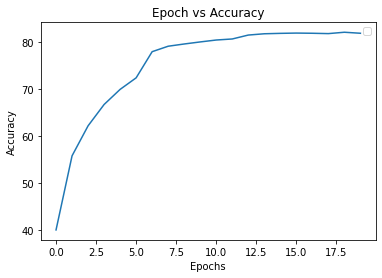

In [25]:
compute_accuracy_graph(train_param.train_accuracies)

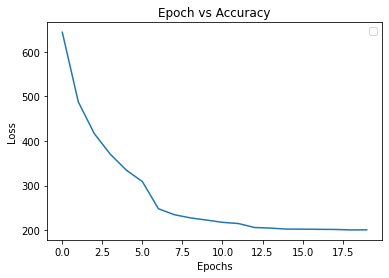

In [26]:
compute_loss_graph(train_param.train_losses)

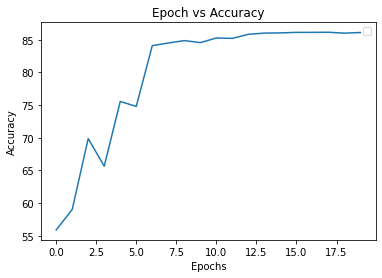

In [27]:
compute_accuracy_graph(test_param.test_accuracies)

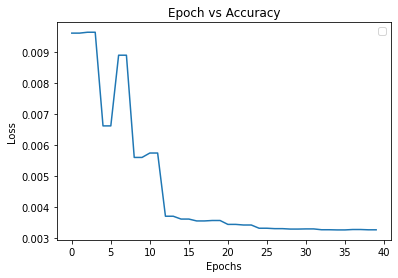

In [28]:
compute_loss_graph(test_param.test_losses)

# Evaluating test Accuracy over different classes


In [31]:
calClassAccuracy(model_new, test_loader, classes, device)

Accuracy of plane : 82 %
Accuracy of   car : 100 %
Accuracy of  bird : 75 %
Accuracy of   cat : 67 %
Accuracy of  deer : 81 %
Accuracy of   dog : 81 %
Accuracy of  frog : 91 %
Accuracy of horse : 92 %
Accuracy of  ship : 90 %
Accuracy of truck : 92 %


# Misclassified images

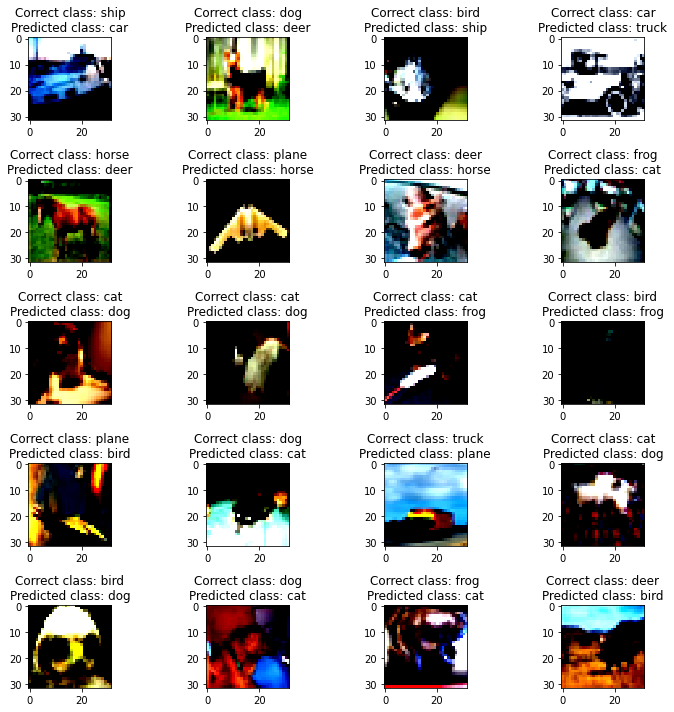

In [32]:
plot_misclassified_images(model_new, test_loader, classes, device)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


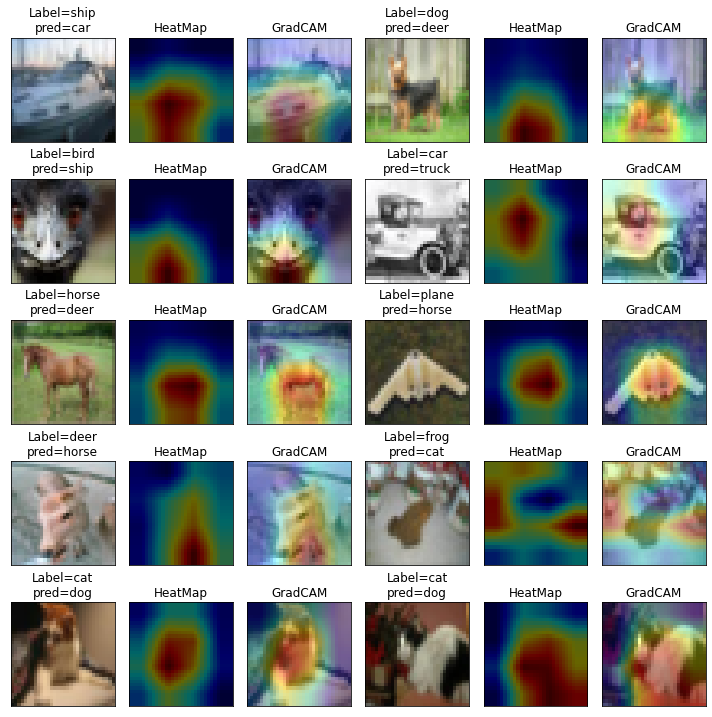

In [68]:
plotGradCAM(model_new, test_loader, classes, device)